In [2]:
import math
import numpy
import numpy as np
import pandas as pd
import pandas_datareader as pdd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt

C:\Users\X\Anaconda3\envs\tensorflow2\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [3]:
df = pdd.DataReader('AMD', data_source='yahoo', start='2018-01-01', end='2020-7-13')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,11.020000,10.340000,10.420000,10.980000,44146300,10.980000
2018-01-03,12.140000,11.360000,11.610000,11.550000,154066700,11.550000
2018-01-04,12.430000,11.970000,12.100000,12.120000,109503000,12.120000
2018-01-05,12.220000,11.660000,12.190000,11.880000,63808900,11.880000
2018-01-08,12.300000,11.850000,12.010000,12.280000,63346000,12.280000
...,...,...,...,...,...,...
2020-07-07,54.169998,52.860001,53.279999,52.930000,32153100,52.930000
2020-07-08,53.470001,52.070000,53.009998,53.430000,35608300,53.430000
2020-07-09,57.580002,53.310001,53.520000,57.259998,87216300,57.259998


(636, 6)

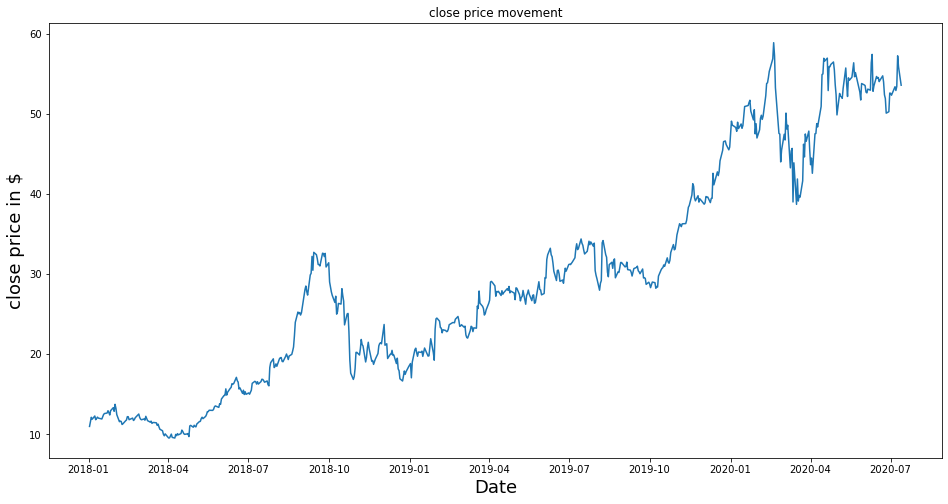

In [4]:
plt.figure(figsize=(16,8))
plt.title('close price movement')
plt.plot(df['Close'])
#plt.plot(df['Volume'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price in $', fontsize=18)
plt.show
df.shape


In [5]:
data = df.filter(['Close']) ## filter out close price col
dataset = data.values ## convert data frame to np array with values function
len(dataset)

#scaler=MinMaxScaler(feature_range=(0,1))
#scaled_data =scaler.fit_transform(dataset)
#scalerdf=scaler.fit_transform(np.array(df).reshape(-1,1))

636

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))## make values between zero and 1
                                          ## to nornalize data set
scaled_data =scaler.fit_transform(dataset)
scaled_data

array([[2.93700579e-02],
       [4.09155435e-02],
       [5.24610099e-02],
       [4.75997629e-02],
       [5.57018412e-02],
       [4.63844415e-02],
       [4.92201786e-02],
       [5.28661235e-02],
       [5.04355000e-02],
       [4.82074140e-02],
       [5.36763313e-02],
       [5.95503429e-02],
       [6.19809663e-02],
       [6.31962684e-02],
       [6.90702800e-02],
       [6.44115898e-02],
       [5.83350215e-02],
       [6.92728368e-02],
       [7.67672640e-02],
       [6.76524211e-02],
       [8.52744558e-02],
       [7.53494051e-02],
       [5.91452293e-02],
       [4.13206378e-02],
       [4.29410534e-02],
       [4.19283081e-02],
       [3.42313241e-02],
       [3.60542966e-02],
       [4.35487238e-02],
       [4.55742337e-02],
       [5.40814255e-02],
       [5.38788688e-02],
       [4.63844415e-02],
       [5.04355000e-02],
       [4.43589316e-02],
       [4.67895551e-02],
       [5.14482453e-02],
       [5.85375783e-02],
       [6.07656449e-02],
       [5.22584531e-02],


In [7]:
scaled_data.shape

(636, 1)

In [8]:
print(scaled_data)

[[2.93700579e-02]
 [4.09155435e-02]
 [5.24610099e-02]
 [4.75997629e-02]
 [5.57018412e-02]
 [4.63844415e-02]
 [4.92201786e-02]
 [5.28661235e-02]
 [5.04355000e-02]
 [4.82074140e-02]
 [5.36763313e-02]
 [5.95503429e-02]
 [6.19809663e-02]
 [6.31962684e-02]
 [6.90702800e-02]
 [6.44115898e-02]
 [5.83350215e-02]
 [6.92728368e-02]
 [7.67672640e-02]
 [6.76524211e-02]
 [8.52744558e-02]
 [7.53494051e-02]
 [5.91452293e-02]
 [4.13206378e-02]
 [4.29410534e-02]
 [4.19283081e-02]
 [3.42313241e-02]
 [3.60542966e-02]
 [4.35487238e-02]
 [4.55742337e-02]
 [5.40814255e-02]
 [5.38788688e-02]
 [4.63844415e-02]
 [5.04355000e-02]
 [4.43589316e-02]
 [4.67895551e-02]
 [5.14482453e-02]
 [5.85375783e-02]
 [6.07656449e-02]
 [5.22584531e-02]
 [4.80048572e-02]
 [4.61819041e-02]
 [4.82074140e-02]
 [4.51691395e-02]
 [5.48916334e-02]
 [4.94227354e-02]
 [4.39538181e-02]
 [4.03078925e-02]
 [4.27385160e-02]
 [3.70670419e-02]
 [3.90925711e-02]
 [3.92951279e-02]
 [3.84849201e-02]
 [3.20032381e-02]
 [3.50415320e-02]
 [2.795219

In [9]:
training_size=int(len(scaled_data)*0.8)
test_size=len(scaled_data)-training_size
train_data,test_data=scaled_data[0:training_size,:],scaled_data[training_size:len(df),:1]

In [10]:
training_size,test_size

(508, 128)

In [11]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [12]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [13]:
print(X_train.shape), print(y_train.shape)

(407, 100)
(407,)


(None, None)

In [14]:
print(X_test.shape), print(ytest.shape)

(27, 100)
(27,)


(None, None)

In [15]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [16]:
model=Sequential()
#model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
#model.add(LSTM(50,return_sequences=True))
#model.add(LSTM(50))
#model.add(Dense(1))

model.add(LSTM(50, return_sequences=True, input_shape =(100, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)               

In [18]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=7,verbose=1)


Train on 407 samples, validate on 27 samples
Epoch 1/100
407/407 [==============================] - 27s 65ms/step - loss: 0.0204 - val_loss: 0.0019
Epoch 2/100
407/407 [==============================] - 24s 60ms/step - loss: 0.0057 - val_loss: 0.0312
Epoch 3/100
407/407 [==============================] - 25s 60ms/step - loss: 0.0050 - val_loss: 0.0031
Epoch 4/100
407/407 [==============================] - 25s 61ms/step - loss: 0.0049 - val_loss: 0.0142
Epoch 5/100
407/407 [==============================] - 24s 59ms/step - loss: 0.0041 - val_loss: 0.0529
Epoch 6/100
407/407 [==============================] - 24s 59ms/step - loss: 0.0045 - val_loss: 0.0037
Epoch 7/100
407/407 [==============================] - 24s 60ms/step - loss: 0.0038 - val_loss: 0.0022
Epoch 8/100
407/407 [==============================] - 24s 60ms/step - loss: 0.0050 - val_loss: 0.0196
Epoch 9/100
407/407 [==============================] - 25s 62ms/step - loss: 0.0042 - val_loss: 0.0035
Epoch 10/100
407/407 [======

407/407 [==============================] - 24s 60ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 80/100
407/407 [==============================] - 24s 60ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 81/100
407/407 [==============================] - 25s 61ms/step - loss: 0.0010 - val_loss: 0.0014
Epoch 82/100
407/407 [==============================] - 24s 60ms/step - loss: 0.0011 - val_loss: 0.0022
Epoch 83/100
407/407 [==============================] - 25s 62ms/step - loss: 9.9925e-04 - val_loss: 0.0022
Epoch 84/100
407/407 [==============================] - 24s 60ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 85/100
407/407 [==============================] - 25s 61ms/step - loss: 0.0012 - val_loss: 0.0028
Epoch 86/100
407/407 [==============================] - 25s 61ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 87/100
407/407 [==============================] - 25s 61ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 88/100
407/407 [==============================] - 24s 60ms/step - l

In [19]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [20]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [21]:
math.sqrt(mean_squared_error(y_train,train_predict))

27.1113316404023

In [22]:
math.sqrt(mean_squared_error(ytest,test_predict))

49.32686635231139

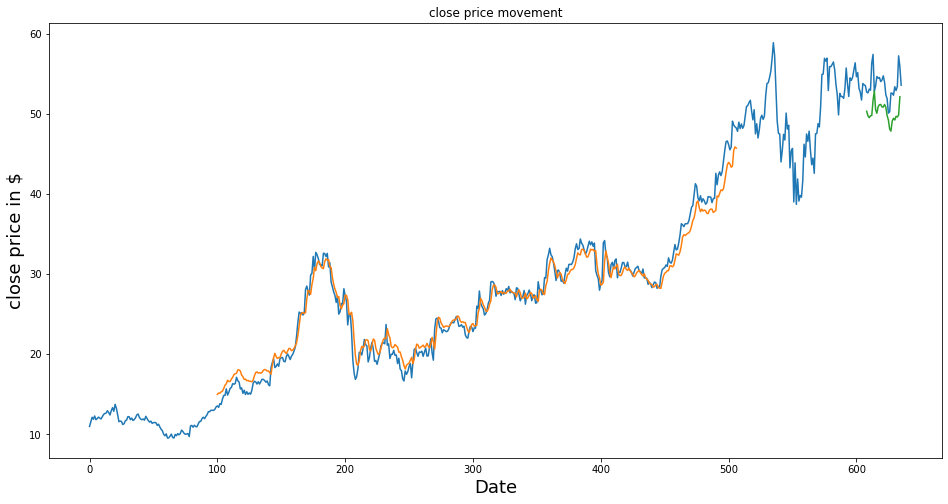

In [23]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(scaled_data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(scaled_data)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(scaled_data)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(16,8))
plt.title('close price movement')
plt.plot(scaler.inverse_transform(scaled_data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price in $', fontsize=18)
plt.show()

In [24]:
len(test_data)

128

In [25]:
x_input=test_data[len(test_data)-100:].reshape(1,-1)
x_input.shape

(1, 100)

In [26]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [27]:
temp_input

[0.9669839779436791,
 0.8861656361659402,
 0.8019039449295888,
 0.7705083771602717,
 0.7688880001407814,
 0.6983997840063936,
 0.7281749747562205,
 0.7682802911493984,
 0.7538991070560519,
 0.8219566417599344,
 0.7814462117950056,
 0.7911687057144869,
 0.6834109681891773,
 0.7261494841649794,
 0.7326311467779669,
 0.5971237090940713,
 0.6961717752630336,
 0.5910471600528346,
 0.6552562317263537,
 0.5993517951049445,
 0.6135304610461723,
 0.6092768844440579,
 0.6503949461328566,
 0.74316386784095,
 0.7109580729281311,
 0.7690905182929002,
 0.7504557575974393,
 0.7763824080493895,
 0.7281749747562205,
 0.6913104896695363,
 0.7081223551933882,
 0.6696374158197005,
 0.7694956318646511,
 0.7703058590081528,
 0.7952197641644825,
 0.7869151291123726,
 0.838768430016273,
 0.9195867717940118,
 0.9208021125092645,
 0.9605023153306915,
 0.9534129437263212,
 0.9609074289024424,
 0.8788737464094509,
 0.9396393913568444,
 0.9392343550526066,
 0.9449057905220923,
 0.9511849349829611,
 0.9313347563047

In [28]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input \n {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output \n{}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.8332683]
101
1 day input 
 [0.88616564 0.80190394 0.77050838 0.768888   0.69839978 0.72817497
 0.76828029 0.75389911 0.82195664 0.78144621 0.79116871 0.68341097
 0.72614948 0.73263115 0.59712371 0.69617178 0.59104716 0.65525623
 0.5993518  0.61353046 0.60927688 0.65039495 0.74316387 0.71095807
 0.76909052 0.75045576 0.77638241 0.72817497 0.69131049 0.70812236
 0.66963742 0.76949563 0.77030586 0.79521976 0.78691513 0.83876843
 0.91958677 0.92080211 0.96050232 0.95341294 0.96090743 0.87887375
 0.93963939 0.93923436 0.94490579 0.95118493 0.93133476 0.89386264
 0.86813851 0.81729795 0.87158193 0.86408745 0.86347982 0.85922624
 0.88434266 0.93599352 0.89588813 0.86388493 0.91107954 0.90480047
 0.9127     0.93052461 0.94915937 0.91391534 0.92444798 0.88434266
 0.87522788 0.85497266 0.89669836 0.89325501 0.89143204 0.87502528
 0.87299979 0.88251969 0.87988657 0.94915937 0.97042733 0.87705085
 0.89062181 0.91452297 0.9100668  0.91188977 0.90155964 0.90540811
 0.91614335 0.9005469  0.8681385

9 day output 
[[0.61878073]]
10 day input 
 [0.78144621 0.79116871 0.68341097 0.72614948 0.73263115 0.59712371
 0.69617178 0.59104716 0.65525623 0.5993518  0.61353046 0.60927688
 0.65039495 0.74316387 0.71095807 0.76909052 0.75045576 0.77638241
 0.72817497 0.69131049 0.70812236 0.66963742 0.76949563 0.77030586
 0.79521976 0.78691513 0.83876843 0.91958677 0.92080211 0.96050232
 0.95341294 0.96090743 0.87887375 0.93963939 0.93923436 0.94490579
 0.95118493 0.93133476 0.89386264 0.86813851 0.81729795 0.87158193
 0.86408745 0.86347982 0.85922624 0.88434266 0.93599352 0.89588813
 0.86388493 0.91107954 0.90480047 0.9127     0.93052461 0.94915937
 0.91391534 0.92444798 0.88434266 0.87522788 0.85497266 0.89669836
 0.89325501 0.89143204 0.87502528 0.87299979 0.88251969 0.87988657
 0.94915937 0.97042733 0.87705085 0.89062181 0.91452297 0.9100668
 0.91188977 0.90155964 0.90540811 0.91614335 0.9005469  0.86813851
 0.85882113 0.82175405 0.82539999 0.87259468 0.87198705 0.86712576
 0.88859632 0.87907

[[0.49143514]]
19 day input 
 [0.5993518  0.61353046 0.60927688 0.65039495 0.74316387 0.71095807
 0.76909052 0.75045576 0.77638241 0.72817497 0.69131049 0.70812236
 0.66963742 0.76949563 0.77030586 0.79521976 0.78691513 0.83876843
 0.91958677 0.92080211 0.96050232 0.95341294 0.96090743 0.87887375
 0.93963939 0.93923436 0.94490579 0.95118493 0.93133476 0.89386264
 0.86813851 0.81729795 0.87158193 0.86408745 0.86347982 0.85922624
 0.88434266 0.93599352 0.89588813 0.86388493 0.91107954 0.90480047
 0.9127     0.93052461 0.94915937 0.91391534 0.92444798 0.88434266
 0.87522788 0.85497266 0.89669836 0.89325501 0.89143204 0.87502528
 0.87299979 0.88251969 0.87988657 0.94915937 0.97042733 0.87705085
 0.89062181 0.91452297 0.9100668  0.91188977 0.90155964 0.90540811
 0.91614335 0.9005469  0.86813851 0.85882113 0.82175405 0.82539999
 0.87259468 0.87198705 0.86712576 0.88859632 0.87907634 0.88920395
 0.96678138 0.93882924 0.89244478 0.83326828 0.79237998 0.76045978
 0.73615122 0.71579707 0.6966639

[[0.4254545]]
28 day input 
 [0.72817497 0.69131049 0.70812236 0.66963742 0.76949563 0.77030586
 0.79521976 0.78691513 0.83876843 0.91958677 0.92080211 0.96050232
 0.95341294 0.96090743 0.87887375 0.93963939 0.93923436 0.94490579
 0.95118493 0.93133476 0.89386264 0.86813851 0.81729795 0.87158193
 0.86408745 0.86347982 0.85922624 0.88434266 0.93599352 0.89588813
 0.86388493 0.91107954 0.90480047 0.9127     0.93052461 0.94915937
 0.91391534 0.92444798 0.88434266 0.87522788 0.85497266 0.89669836
 0.89325501 0.89143204 0.87502528 0.87299979 0.88251969 0.87988657
 0.94915937 0.97042733 0.87705085 0.89062181 0.91452297 0.9100668
 0.91188977 0.90155964 0.90540811 0.91614335 0.9005469  0.86813851
 0.85882113 0.82175405 0.82539999 0.87259468 0.87198705 0.86712576
 0.88859632 0.87907634 0.88920395 0.96678138 0.93882924 0.89244478
 0.83326828 0.79237998 0.76045978 0.73615122 0.71579707 0.69666398
 0.67742676 0.65781128 0.63810682 0.61878073 0.60025108 0.5827924
 0.56652951 0.55147171 0.53755736 0

In [29]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [30]:
len(scaled_data)

636

Text(0, 0.5, 'close price in $')

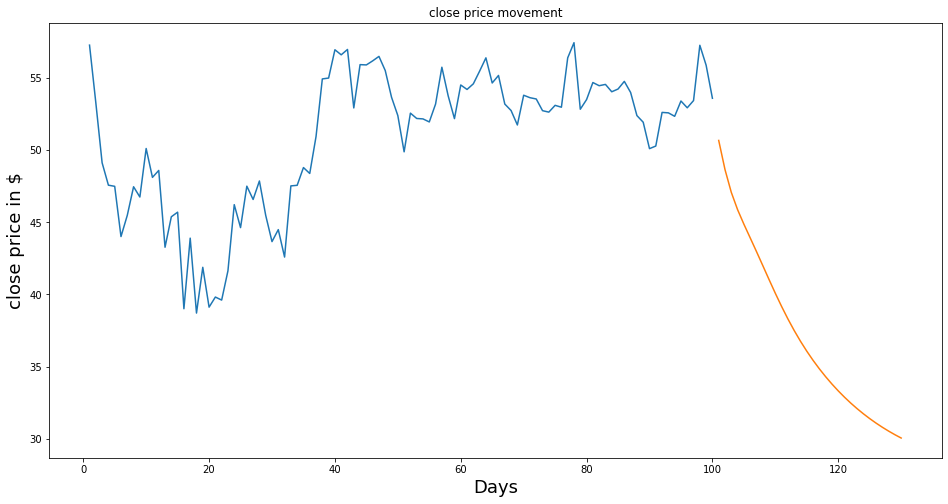

In [31]:
plt.figure(figsize=(16,8))
plt.title('close price movement')
plt.plot(day_new,scaler.inverse_transform(scaled_data[len(scaled_data)-100:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.xlabel('Days', fontsize=18)
plt.ylabel('close price in $', fontsize=18)



In [32]:
print(scaler.inverse_transform(lst_output))

[[50.66845645]
 [48.64980054]
 [47.07390047]
 [45.87378671]
 [44.8689022 ]
 [43.92430146]
 [42.97455986]
 [42.00614401]
 [41.03333473]
 [40.07920559]
 [39.16439656]
 [38.30246163]
 [37.49956278]
 [36.75615905]
 [36.06920773]
 [35.43407409]
 [34.84579382]
 [34.29979694]
 [33.79215349]
 [33.31959711]
 [32.87939993]
 [32.46922839]
 [32.08702705]
 [31.73092728]
 [31.39920322]
 [31.09024227]
 [30.80253925]
 [30.53468903]
 [30.28538506]
 [30.05341054]]


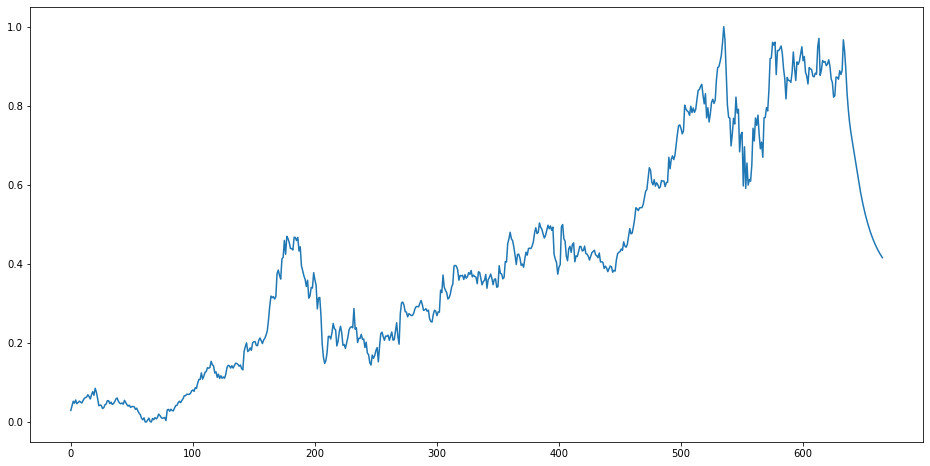

In [33]:
plt.figure(figsize=(16,8))
df3=scaled_data.tolist()
df3.extend(lst_output)
plt.plot(df3[0:])

In [34]:
df3=scaler.inverse_transform(df3).tolist()

Text(0, 0.5, 'close price in $')

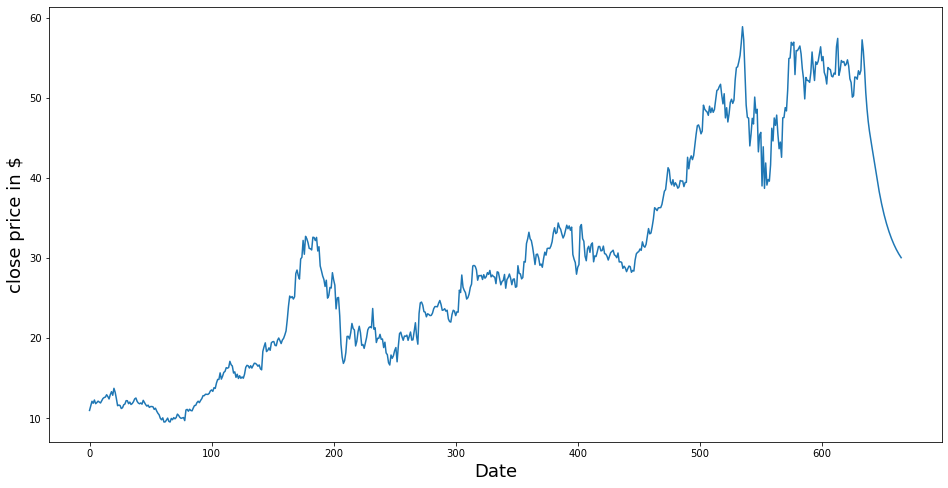

In [35]:
plt.figure(figsize=(16,8))
plt.plot(df3[0:])
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price in $', fontsize=18)

In [36]:
!pip install pyyaml
!pip install h5py

In [37]:
model.save('TFModel/model') 

In [38]:
from tensorflow.keras.models import load_model
# load the pb model
model_tf = load_model('TFModel/model')
# predict
train_predict=model_tf.predict(X_train)
test_predict=model_tf.predict(X_test)

train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

math.sqrt(mean_squared_error(y_train,train_predict))



27.1113316404023

In [39]:
math.sqrt(mean_squared_error(ytest,test_predict))

49.32686635231139